#### Introduction

A churn model is a mathematical representation of how churn impacts your business. Churn calculations are built on existing data (the number of customers who left your service during a given time period). A predictive churn model extrapolates on this data to show future potential churn rates.

In its simplest form, churn rate is calculated by dividing the number of customer cancellations within a time period by the number of active customers at the start of that period. Very valuable insights can be gathered from this simple analysis — for example, the overall churn rate can provide a benchmark against which to measure the impact of a model. And knowing how churn rate varies by time of the week or month, product line, or customer cohort can help inform simple customer segments for targeting as well.

### Importing Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Churn_Modelling.csv')

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Understanding the Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.shape

(10000, 14)

In [12]:
#names of all present attributes in the dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Checking for Missing Values

In [13]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Exploratory Data Analysis (EDA)

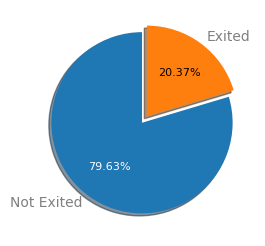

In [14]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

20% of the customers have churned and 80% haven't.

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


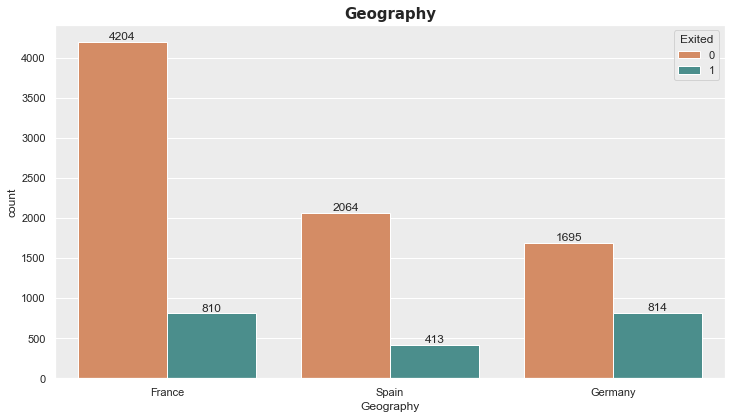

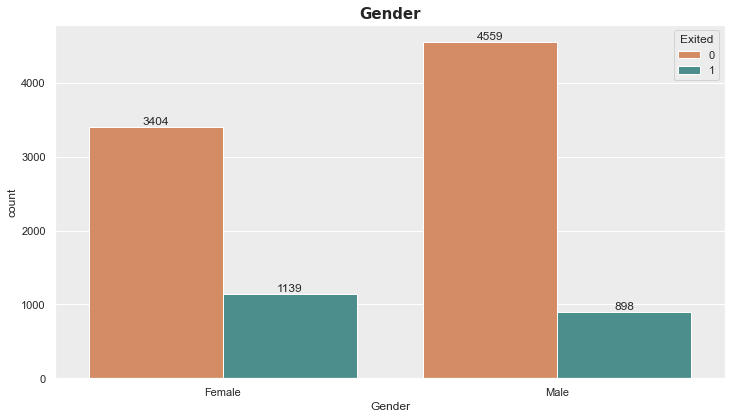

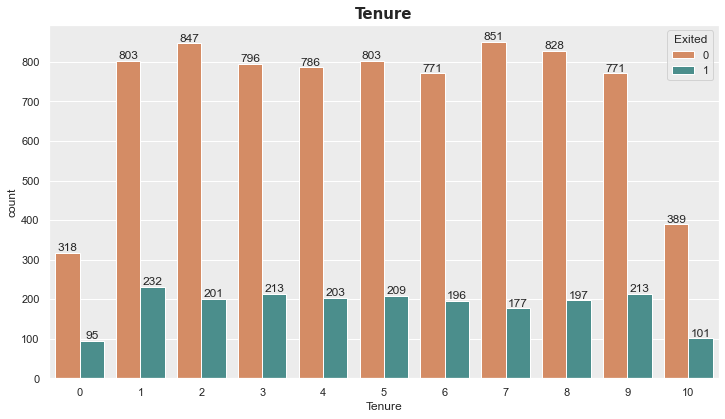

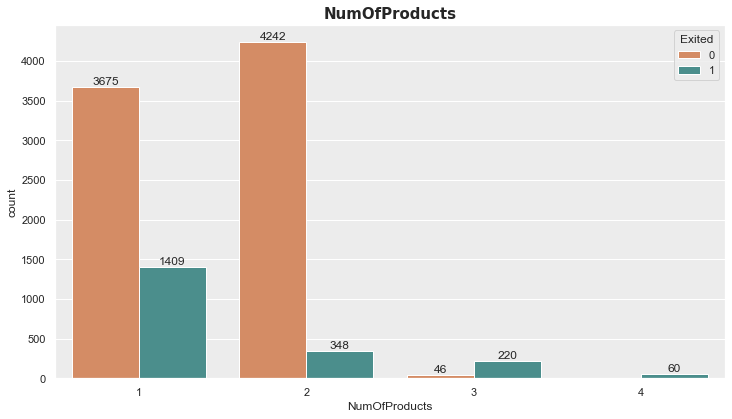

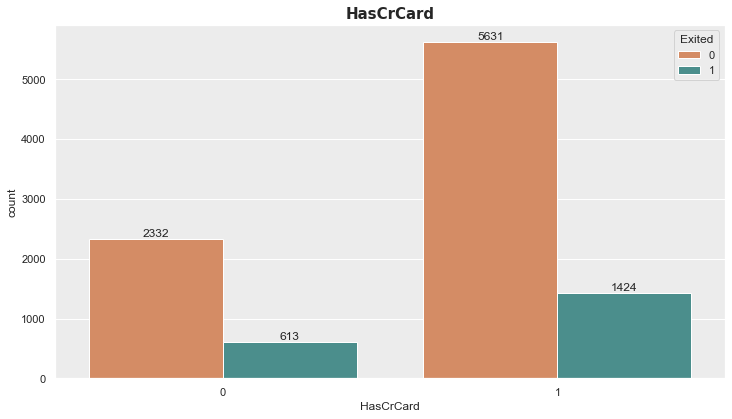

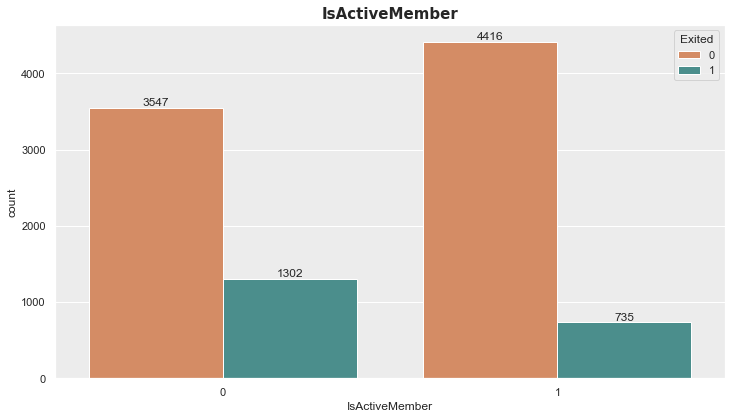

In [15]:
#create a list of categorical features and plot them
list_of_cat_features = df[['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]  
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_cat_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    ax = sns.countplot(data = df, x = df[feature], hue = 'Exited', palette=palette_features)
    #add labels to each bar
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

From above Plots we can conclude that:-

- Majority of the customers are from france but most customers which churned are from germany maybe because of lack of resources as there are not many customers.
    
- The proportion of female customers churning is also greater than that of female customers.
    
- Majority of customers have tenure between 1 to 9 and churing rate is also high between these tenures.
    
- Most of the customers have 1 or 2 products and most customers which churned are having 1 products maybe they are not satisfied so they are churning.
    
- Interestingly, majority of customers that churned are those with credit cards but this can be a coincidence as majority of customers have credit cards.
    
- Unsurprisingly the inactive members have a greater churn and the overall proportion of inactive members is also very high.

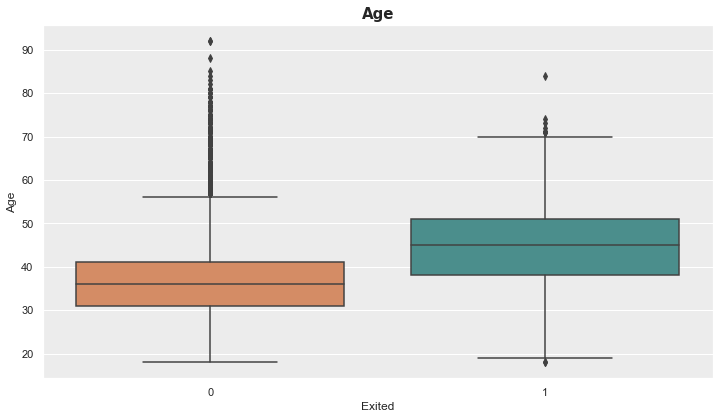

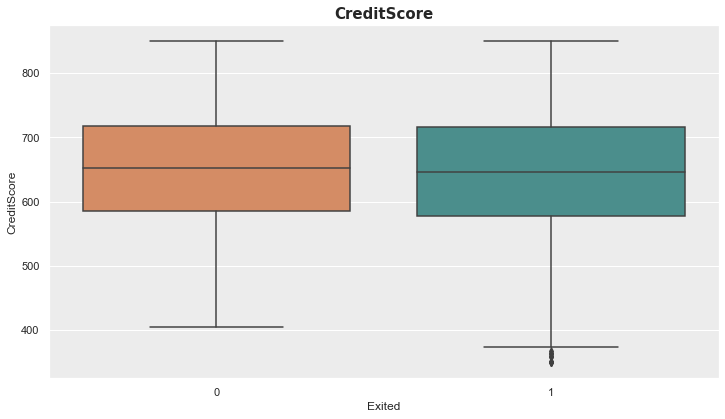

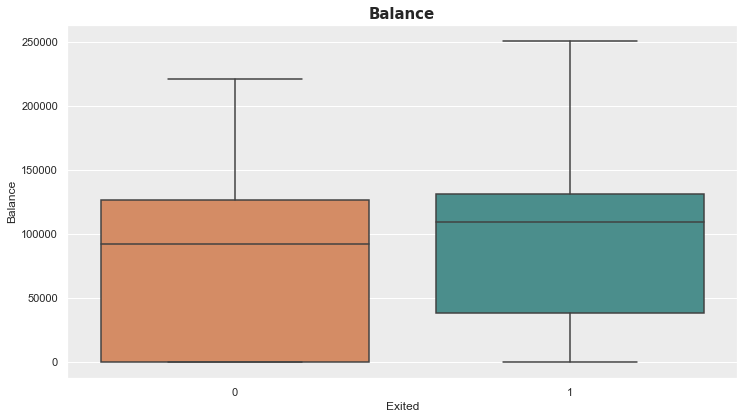

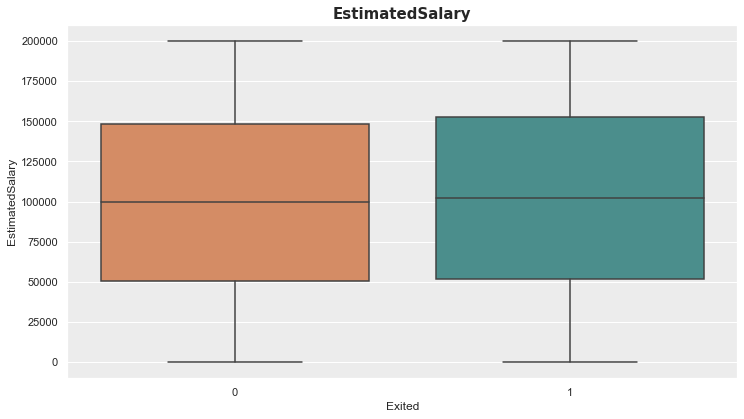

In [16]:
#create a list of numerical features and plot them
list_of_num_features = df[['Age', 'CreditScore', 'Balance', 'EstimatedSalary']]  
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_num_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    ax = sns.boxplot(x = df['Exited'], y = df[feature], data = df, palette=palette_features)
    #add labels to each bar
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

From above Plots we can conclude that:-

- There is no significant difference in credit score distribution etween custers which are churned or not.
- The older customers are churning more than younger ones.
- Bank is loosing customers with significant bank balance.
- Estimated Salary does not have a significant on the likelihood to churn.
- Interestingly, majority of customers that churned are those with credit cards but this can be a coincidence as majority of customers have credit cards.
- Unsurprisingly the inactive members have a greater churn and the overall proportion of inactive members is also very high.

We have already come to some conclusions regarding features:

- Geography attribute shows that in Germany, one third of all clients decided to leave the bank.
- Gender attribute shows that 1/4 of female clients tend to choose another bank as to 1/5 of male clients.
- Results of tenure attribute seems to be similarly low in first and tenth year and similarly high between second and ninth year.
- NumOfProducts attribute shows us that vast majority of clients owns one or two products and clients with more than 3 products do not leave the bank whereas almost 1/3 of clients with only one product left the bank.
- HasCrCard attribute has similar results of target variable for both owners of the credit card and not-owners (3/4 to 1/4 distribution for target variable in this attrbiute HasCrCard).
- For attribute IsActiveMember only every fifth active member left the company whereas more than 1/4 of non-active clients left the company. We are unable to tell what exactly this attribute means since it was not explained in the dataset description.
- Age attribute tells us that clients who are older tend to leave the bank more often than their younger
parts.

- Since results of target variable for CreditScore and EstimatedSalary are very similar to each other, it is impossible based on this chart to tell, which customer will likely churn and which not.
- Clients with higher balance on their bank accounts tend to leave the bank more often.

Last attribute to plot is the target variable, Exited. As we can notice, target variable is heavily imbalanced, which means that further used ML models will tend to prefer target variable with value 0 over 1. As we want our models to be useful on different, unseen datasets as well, we have to deal with this problem later on.

1) Female is easier exit than Male

2) Customer in Germany more likely to exit

3) Inactive Member has higher proportion to exit than Active Member

4) Credit Card is not correlated to Exit

5) Customer with 2 products have higher proportion not exit

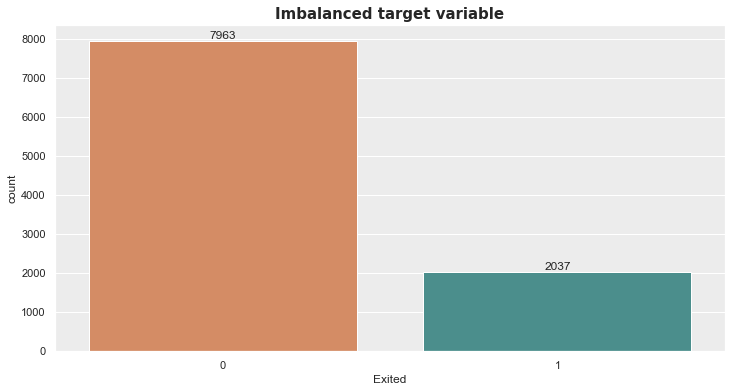

In [17]:
#plotting 'Exited' = target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x=df['Exited'], data=df, palette=palette_features)

#add labels to each bar
abs_values = df['Exited'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values) 

#show the plot
plt.show()

#### Analyzing relationships between variables

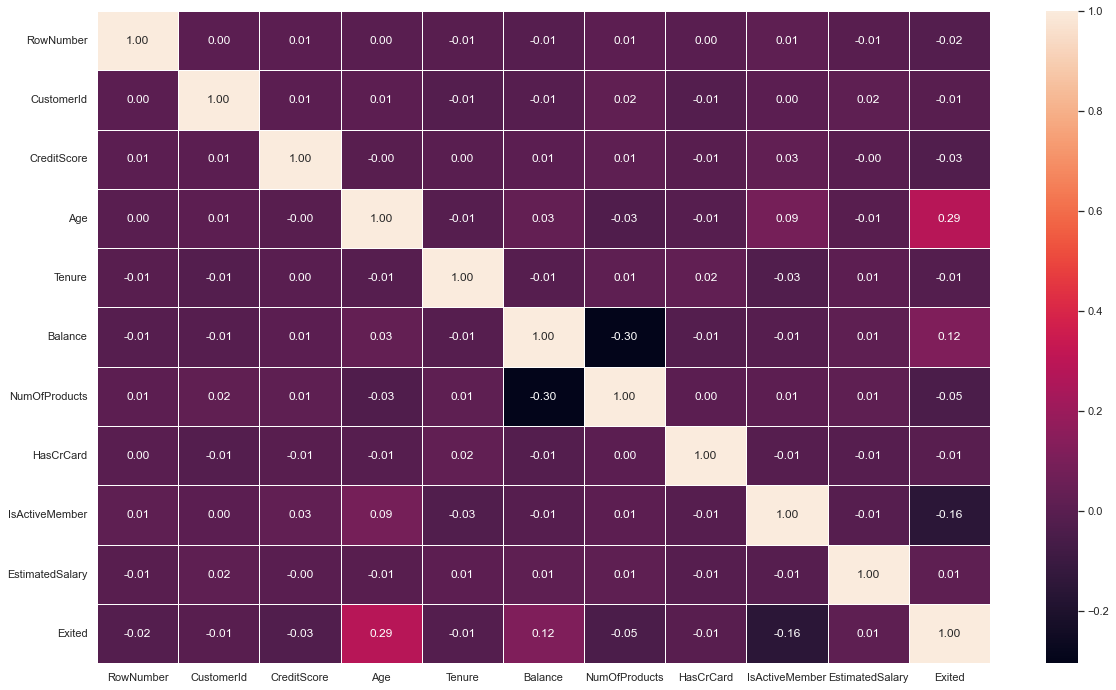

In [18]:
# heatmap 

plt.figure(figsize = (20, 12))

corr = df.corr()

sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

The age of a customer has the strongest correlation with whether they have left the bank, with a coefficient of 0.29.

We can say that there is no multicolinearity present in data.

We would also like to check, whether there are any significant (<= -0.70, >= 0.70) correlations between all features. The highest correlations are between NumOfProducts and Balance (-0.30) and also between Age and Exited (0.29). Nevertheless, it is not enough to consider these relations as statistically significant.

<AxesSubplot:xlabel='Age', ylabel='Count'>

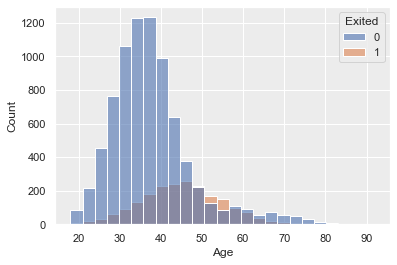

In [36]:
sns.histplot(x='Age', hue='Exited', data=df, bins=25, alpha=0.6)

The average age of customers who do not leave the bank is 30-40 years old, while the average age of customers who leave the bank is 40-50 years old.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

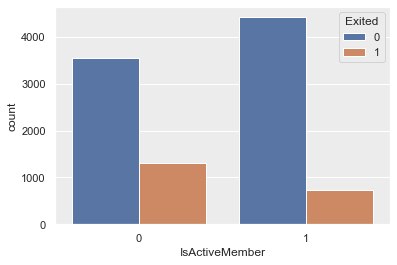

In [37]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df)

Customers who are not active members are at a higher risk of leaving the bank.

From the information we've learned about our dataset, we have to deal with the following challenges:

We need to transform all categorical attributes into numerical so that models can mostly work only with numerical inputs.
The target variable "Exited" is highly unbalanced, it needs to be balanced in order to be able to implement various machine learning models with fair, unbiased results.



####  Cleaning dataset

In [19]:
# dropping useless columns 

df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [21]:
# Encoding categorical variables

df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


### Balancing the target variable

In [23]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [24]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [25]:
# Prior features and target variable
columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
X = df[columns]
y = df['Exited']

# Initialize SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)  # Adjust the sampling strategy as needed

# Resample the dataset
X_train_balanced, y_train_balanced = smote.fit_resample(X, y)

print(f"Imbalanced target class: {Counter(y)}\n")
print(f"Balanced target class: {Counter(y_train_balanced)}\n")
print(X_train_balanced.shape[0] - df.shape[0], 'new synthetic samples created')

Imbalanced target class: Counter({0: 7963, 1: 2037})

Balanced target class: Counter({1: 7963, 0: 7963})

5926 new synthetic samples created


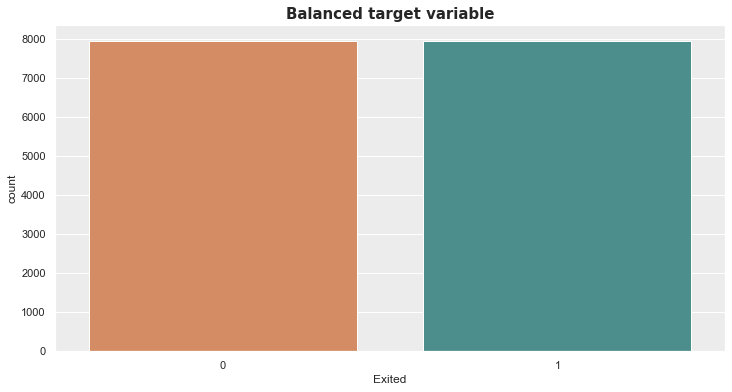

In [26]:
#plot the balanced target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x=y_train_balanced, data=df, palette=palette_features)
plt.show()

### Preparation and implementation of Deep Learning Models

In [27]:
# creating features and label 

from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis = 1)
y = to_categorical(df.Exited)

In [28]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [29]:
# Scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building ANN

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# initializing ann
model = Sequential()

# adding the first input layer and the first hidden layer
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the third hidden layer
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the output layer
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set 

model_history = model.fit(X_train, y_train, validation_split = 0.20, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
235/235 [==============================] - 5s 7ms/step - loss: 0.6167 - accuracy: 0.7040 - val_loss: 0.5501 - val_accuracy: 0.7980
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.4543 - accuracy: 0.8107 - val_loss: 0.4205 - val_accuracy: 0.8324
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3995 - accuracy: 0.8328 - val_loss: 0.3852 - val_accuracy: 0.8416
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3938 - accuracy: 0.8364 - val_loss: 0.3751 - val_accuracy: 0.8436
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3803 - accuracy: 0.8452 - val_loss: 0.3707 - val_accuracy: 0.8460
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3710 - accuracy: 0.8511 - val_loss: 0.3642 - val_accuracy: 0.8488
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3696 - accuracy: 0.8471 - val_loss: 0.3648 - val_accuracy: 0.8504

Epoch 58/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3635 - accuracy: 0.8507 - val_loss: 0.3612 - val_accuracy: 0.8524
Epoch 59/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3575 - accuracy: 0.8531 - val_loss: 0.3612 - val_accuracy: 0.8448
Epoch 60/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3612 - accuracy: 0.8549 - val_loss: 0.3643 - val_accuracy: 0.8520
Epoch 61/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3623 - accuracy: 0.8520 - val_loss: 0.3567 - val_accuracy: 0.8512
Epoch 62/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3618 - accuracy: 0.8541 - val_loss: 0.3596 - val_accuracy: 0.8528
Epoch 63/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3575 - accuracy: 0.8535 - val_loss: 0.3608 - val_accuracy: 0.8512
Epoch 64/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3647 - accuracy: 0.8512 - val_loss: 0.3643 - val_accuracy:

### Visualizing Training and Validation Loss

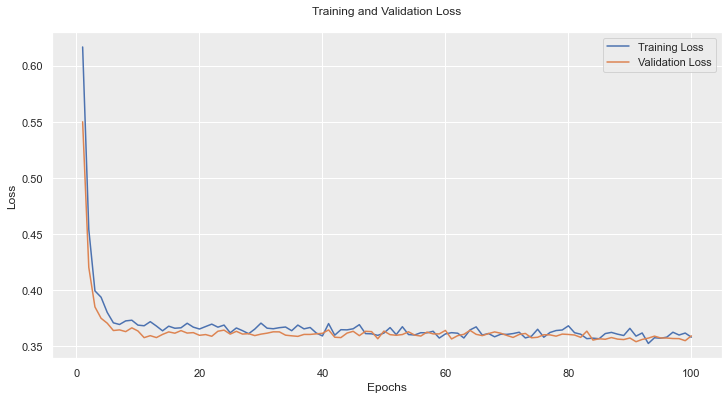

In [31]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Visualizing Training and Validation accuracy

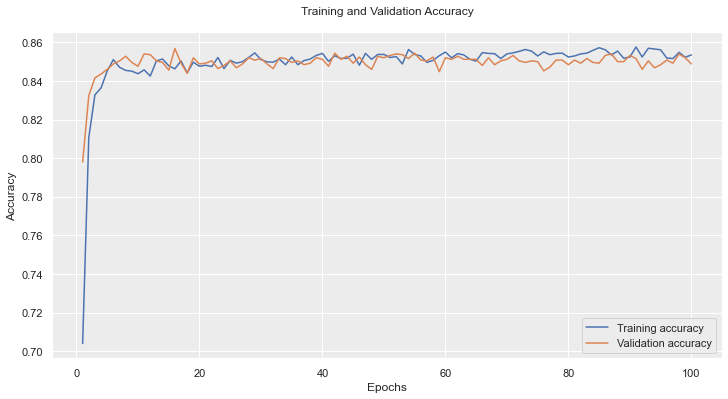

In [32]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

79/79 [==============================] - 0s 3ms/step - loss: 0.3594 - accuracy: 0.8488
Accuracy of model is 0.848800003528595


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 batch_normalization (Batch  (None, 10)                40        
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 batch_normalization_1 (Bat  (None, 7)                 28        
 chNormalization)                                       

79/79 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

          No       0.87      0.96      0.91      1995
         Yes       0.71      0.43      0.53       505

    accuracy                           0.85      2500
   macro avg       0.79      0.69      0.72      2500
weighted avg       0.84      0.85      0.83      2500



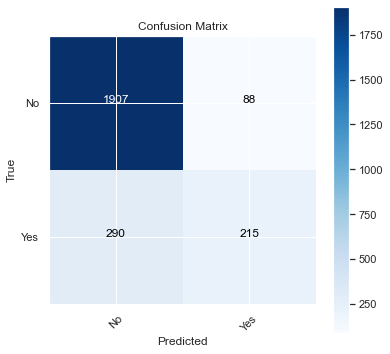

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Predict the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Convert the one-hot encoded y_test back to labels "Yes" and "No"
y_test_labels = ["Yes" if label[1] == 1 else "No" for label in y_test]
y_pred_labels = ["Yes" if label[1] == 1 else "No" for label in y_pred]

# Create the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Create the classification report
class_report = classification_report(y_test_labels, y_pred_labels)

# Print the classification report
print(class_report)

# Create a graphical representation of the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ["No", "Yes"], rotation=45)
plt.yticks(tick_marks, ["No", "Yes"])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                704       
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_6 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 128)              

118/118 [==============================] - 1s 8ms/step - loss: 0.3306 - accuracy: 0.8609 - val_loss: 0.3588 - val_accuracy: 0.8504
Epoch 45/100
118/118 [==============================] - 1s 8ms/step - loss: 0.3306 - accuracy: 0.8613 - val_loss: 0.3582 - val_accuracy: 0.8504
Epoch 46/100
118/118 [==============================] - 1s 9ms/step - loss: 0.3329 - accuracy: 0.8612 - val_loss: 0.3585 - val_accuracy: 0.8520
Epoch 47/100
118/118 [==============================] - 1s 8ms/step - loss: 0.3336 - accuracy: 0.8632 - val_loss: 0.3541 - val_accuracy: 0.8504
Epoch 48/100
118/118 [==============================] - 1s 8ms/step - loss: 0.3329 - accuracy: 0.8613 - val_loss: 0.3551 - val_accuracy: 0.8552
Epoch 49/100
118/118 [==============================] - 1s 8ms/step - loss: 0.3326 - accuracy: 0.8643 - val_loss: 0.3587 - val_accuracy: 0.8440
Epoch 50/100
118/118 [==============================] - 1s 8ms/step - loss: 0.3310 - accuracy: 0.8604 - val_loss: 0.3578 - val_accuracy: 0.8524
Epoch

79/79 [==============================] - 0s 4ms/step - loss: 0.3686 - accuracy: 0.8456
Accuracy of the model is 84.56%
79/79 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

          No       0.88      0.94      0.91      1995
         Yes       0.66      0.48      0.55       505

    accuracy                           0.85      2500
   macro avg       0.77      0.71      0.73      2500
weighted avg       0.83      0.85      0.84      2500



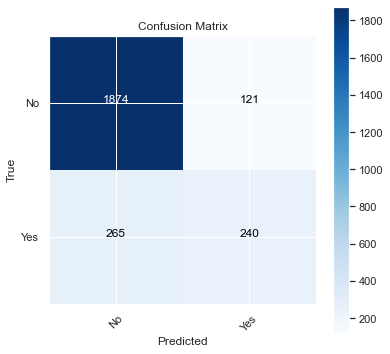

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Initialize the model
model = Sequential()

# Add the input layer
model.add(Dense(64, kernel_initializer='he_normal', activation='relu', input_shape=(10,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Add hidden layers
model.add(Dense(128, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model with custom learning rate
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Fit the model to the training set
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Evaluate the model
acc = model.evaluate(X_test, y_test)[1]
print(f'Accuracy of the model is {acc:.2%}')

# Predict the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred[:, 1] > 0.5).astype(int)

# Convert the one-hot encoded y_test back to labels "Yes" and "No"
y_test_labels = ["Yes" if label[1] == 1 else "No" for label in y_test]
y_pred_labels = ["Yes" if label == 1 else "No" for label in y_pred]

# Create the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Create the classification report
class_report = classification_report(y_test_labels, y_pred_labels)

# Print the classification report
print(class_report)

# Create a graphical representation of the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ["No", "Yes"], rotation=45)
plt.yticks(tick_marks, ["No", "Yes"])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.show()
